# ABOUT: 
- this code evaluates the node2vec embeddings on all node2vec embeddings generated
- findings: 
    - using card_id embeddings appear to cause overfitting
        
- details:       
    - i.e compared to baseline, performance on training set is better but performance on validation set is worse
    - baseline - using just feature_2 as feature
    - model used is Histogram Gradient boosting
    - metrics used are r2 and rmse
    - 3 fold cross validated

In [72]:
from config import *

import pandas as pd
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import nodevectors
from sklearn.model_selection import cross_validate

In [73]:
target_id_column = "merchant_id"
node2vec_path = r"C:\Users\tanch\Documents\NTU\NTU Year 4\Semester 1\CZ4041 - Machine Learning\Team Project\model\node2vec_card_id_merchant_id.zip"
embedding_size = 16

### prepare data

In [74]:
path = r"C:\Users\tanch\Documents\NTU\NTU Year 4\Semester 1\CZ4041 - Machine Learning\Team Project\data\id_columns_processed.csv"
id_columns = pd.read_csv(path, usecols = ["card_id", target_id_column])
id_columns.head()

,card_id,merchant_id
0,C_ID_4e6213e9bc,M_ID_e020e9b302
1,C_ID_4e6213e9bc,M_ID_86ec983688
2,C_ID_4e6213e9bc,M_ID_979ed661fc
3,C_ID_4e6213e9bc,M_ID_e6d5ae8ea6
4,C_ID_4e6213e9bc,M_ID_e020e9b302


In [75]:
# group by card_id, then acquire nunique_merchant_id, count_merchant_id, nunique_count_frac_merchant_id
id_features = id_columns.groupby("card_id").agg(["nunique", "count"])
id_features = id_features.reset_index()
id_features.columns = ["card_id", "nunique_merchant_id", "count_merchant_id"]
id_features["nunique_count_frac_merchant_id"] = id_features["nunique_merchant_id"]/id_features["count_merchant_id"]
id_features

,card_id,nunique_merchant_id,count_merchant_id,nunique_count_frac_merchant_id
0,C_ID_00007093c1,31,151,0.205298
1,C_ID_0001238066,90,149,0.604027
2,C_ID_0001506ef0,29,68,0.426471
3,C_ID_0001793786,150,247,0.607287
4,C_ID_000183fdda,84,155,0.541935
...,...,...,...,...
325535,C_ID_ffff1d9928,12,16,0.750000
325536,C_ID_ffff579d3a,63,115,0.547826
325537,C_ID_ffff756266,14,25,0.560000
325538,C_ID_ffff828181,97,198,0.489899


In [76]:
# load train target variable
train_file = pd.read_csv(train_path, usecols = ["card_id","target", "feature_2"])
train_file.head()

,card_id,feature_2,target
0,C_ID_92a2005557,2,-0.820283
1,C_ID_3d0044924f,1,0.392913
2,C_ID_d639edf6cd,2,0.688056
3,C_ID_186d6a6901,3,0.142495
4,C_ID_cdbd2c0db2,3,-0.159749


In [77]:
# load trained node2vec
node2vec = nodevectors.GGVec.load(node2vec_path)
# convert embeddings to dataframe
node2vec_embeddings = pd.DataFrame.from_dict(node2vec.model, orient = "index")
node2vec_embeddings = node2vec_embeddings.reset_index()
node2vec_embeddings

,index,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,C_ID_00007093c1,-0.072682,0.059939,-0.035718,-0.507144,0.484537,-0.163634,-0.141885,0.232800,-0.473599,-0.359012,0.381937,-0.194508,-0.131536,0.179893,0.409616,0.088422
1,C_ID_0001238066,0.210722,0.312669,-0.520883,-0.249812,-0.363242,-0.132117,0.139158,-0.225415,0.262967,-0.052613,0.148577,0.350702,0.354733,-0.658745,-0.308656,-0.518378
2,C_ID_0001506ef0,0.071951,0.600783,-0.074211,-0.010603,0.465303,-0.063733,-0.164648,0.350252,-0.126781,-0.301627,-0.181813,-0.407964,-0.104659,0.197382,-0.202232,-0.058480
3,C_ID_0001793786,-0.461036,-0.118778,0.298193,0.425997,0.096633,0.125535,-0.083261,-0.238686,-0.250503,0.225745,0.006093,-0.146210,-0.776158,0.388017,0.514659,-0.037183
4,C_ID_000183fdda,-0.236855,-0.031561,-0.334673,-0.366431,0.450655,0.069693,0.139591,-0.513259,-0.161989,0.178157,-0.115979,0.082836,0.134345,-0.327235,0.351243,0.172792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660168,M_ID_fffeeb852d,-0.495755,0.083156,0.145200,-0.403701,-0.486243,0.028347,-0.211832,-0.101902,-0.044037,0.375575,0.158479,0.115163,-0.157367,0.307679,-0.306738,-0.063962
660169,M_ID_fffef87522,-0.075561,0.239505,0.303652,0.341309,-0.443319,0.204595,0.049358,-0.102069,-0.148860,-0.070825,0.116723,0.345221,-0.191478,-0.058667,-0.156204,0.213919
660170,M_ID_ffff0af8e7,-0.192354,-0.089260,-0.363378,0.192582,0.001293,0.121182,0.260083,-0.410028,-0.064522,0.365527,0.458633,-0.163760,-0.045048,0.445095,-0.217569,-0.140139
660171,M_ID_ffff655e2c,-0.097225,0.034523,-0.285844,-0.197016,0.052762,0.005846,-0.072529,0.152449,-0.063171,0.255264,0.610611,0.269365,-0.080027,0.109693,0.096002,0.326257


In [78]:
# group and aggregate the id embeddings (e.g city_id embeddings) by the "card_id"
node2vec_embeddings = id_columns.merge(node2vec_embeddings, how = "left", left_on = "merchant_id", right_on = "index")
node2vec_embeddings = node2vec_embeddings.drop("index", axis = 1)
node2vec_embeddings = node2vec_embeddings.groupby("card_id").mean().reset_index()

In [80]:
node2vec_embeddings

,card_id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,C_ID_00007093c1,0.240035,-0.008940,0.183486,-0.068755,0.287280,-0.110511,0.030815,0.237155,-0.077973,-0.017793,0.196873,-0.014195,0.050116,0.156852,0.239943,0.019909
1,C_ID_0001238066,-0.082188,0.118378,-0.151136,-0.147830,-0.084432,-0.058462,0.084593,-0.173836,-0.039412,-0.019465,0.068317,0.152736,-0.060022,0.012707,-0.156633,-0.037209
2,C_ID_0001506ef0,-0.293739,0.142979,0.132453,-0.004983,0.308517,0.032882,-0.119018,0.154300,-0.092480,0.007875,-0.014443,-0.308194,0.049957,0.084944,-0.132957,-0.128737
3,C_ID_0001793786,-0.054674,-0.025724,0.116930,-0.032562,0.027127,-0.065237,-0.008518,-0.000088,0.294138,0.168495,0.084863,-0.158215,-0.330049,0.159620,0.195890,-0.133651
4,C_ID_000183fdda,-0.080465,-0.016296,-0.017469,-0.095927,0.149595,0.084041,-0.248820,-0.357927,-0.229567,0.004561,-0.202657,-0.186313,-0.073885,-0.003096,0.378063,0.056127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325535,C_ID_ffff1d9928,-0.229091,-0.055329,-0.027627,0.157519,-0.174935,0.006241,-0.146883,0.218513,0.094355,-0.073220,-0.086454,-0.076887,-0.134116,0.106109,0.046940,0.192442
325536,C_ID_ffff579d3a,-0.053132,0.034465,-0.186854,0.116715,0.076655,-0.112643,0.019383,-0.043747,-0.073184,-0.016171,0.206581,0.133093,-0.003764,0.128234,-0.098478,-0.160164
325537,C_ID_ffff756266,-0.169659,0.031127,-0.240533,0.025183,-0.071948,0.145484,0.031459,-0.185838,-0.032465,0.270487,0.184604,0.013366,0.021627,0.221125,-0.061121,-0.066230
325538,C_ID_ffff828181,0.051835,-0.136970,-0.092602,0.086033,0.058512,-0.266178,-0.045897,0.068876,0.344665,-0.077493,-0.006768,-0.084037,-0.151741,0.057403,0.127205,-0.114236


In [81]:
# merge id embeddings with train.csv 
dataset = train_file.merge(node2vec_embeddings, on = "card_id", how = "left")
dataset.head()

,card_id,feature_2,target,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,C_ID_92a2005557,2,-0.820283,-0.055851,0.147994,-0.030757,-0.073910,-0.010504,-0.063806,0.180107,-0.113234,-0.076563,-0.022222,-0.083477,0.082931,0.088083,0.074731,-0.004401,-0.057365
1,C_ID_3d0044924f,1,0.392913,-0.055640,0.154444,-0.048635,-0.070090,0.017265,-0.042851,0.134029,-0.033346,-0.042521,-0.006478,-0.073879,0.012347,0.064042,0.055082,0.043727,-0.019014
2,C_ID_d639edf6cd,2,0.688056,0.038449,0.033729,-0.036073,-0.118617,0.068142,0.057314,0.033151,0.074983,0.034293,-0.042218,-0.002832,-0.039617,0.017628,0.014782,-0.065753,0.084333
3,C_ID_186d6a6901,3,0.142495,0.044003,-0.005825,-0.096572,-0.053282,-0.207161,-0.088515,-0.118196,-0.038728,0.108079,0.132761,-0.082925,-0.112086,0.094630,-0.015612,0.019117,0.214415
4,C_ID_cdbd2c0db2,3,-0.159749,0.078187,-0.054140,-0.079138,-0.052407,-0.314112,-0.103714,-0.183939,-0.040985,0.119379,0.190108,-0.083095,-0.125474,0.122729,-0.010624,0.031643,0.291460


In [72]:
# merge id mode 
dataset = dataset.merge(id_features, on = "card_id", how = "left")
dataset.head()

,card_id,feature_2,target,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,C_ID_92a2005557,2,-0.820283,-0.055851,0.147994,-0.030757,-0.073910,-0.010504,-0.063806,0.180107,-0.113234,-0.076563,-0.022222,-0.083477,0.082931,0.088083,0.074731,-0.004401,-0.057365
1,C_ID_3d0044924f,1,0.392913,-0.055640,0.154444,-0.048635,-0.070090,0.017265,-0.042851,0.134029,-0.033346,-0.042521,-0.006478,-0.073879,0.012347,0.064042,0.055082,0.043727,-0.019014
2,C_ID_d639edf6cd,2,0.688056,0.038449,0.033729,-0.036073,-0.118617,0.068142,0.057314,0.033151,0.074983,0.034293,-0.042218,-0.002832,-0.039617,0.017628,0.014782,-0.065753,0.084333
3,C_ID_186d6a6901,3,0.142495,0.044003,-0.005825,-0.096572,-0.053282,-0.207161,-0.088515,-0.118196,-0.038728,0.108079,0.132761,-0.082925,-0.112086,0.094630,-0.015612,0.019117,0.214415
4,C_ID_cdbd2c0db2,3,-0.159749,0.078187,-0.054140,-0.079138,-0.052407,-0.314112,-0.103714,-0.183939,-0.040985,0.119379,0.190108,-0.083095,-0.125474,0.122729,-0.010624,0.031643,0.291460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201912,C_ID_963962de2c,2,-2.740821,-0.013122,0.236870,0.289252,-0.207090,0.117136,0.291800,-0.057458,-0.159941,-0.003747,-0.032952,0.061431,-0.194918,-0.111148,-0.043113,0.226498,0.355421
201913,C_ID_1314773c0b,1,0.312917,0.157420,0.181673,0.014512,0.340475,0.206347,-0.333574,-0.078791,-0.052758,0.221056,0.040981,0.055776,0.065528,0.173127,-0.056813,0.453101,-0.017889
201914,C_ID_7666735b3d,3,0.093494,-0.091114,0.054468,0.209246,0.073199,-0.016835,0.157624,0.065694,-0.256720,0.005213,0.187832,-0.003995,0.051171,-0.050330,-0.070680,0.037467,0.302887
201915,C_ID_73f5a0efd0,2,-4.676589,-0.098452,0.204648,-0.056958,-0.107394,0.025139,-0.055621,0.171532,-0.061262,-0.067451,-0.019096,-0.095742,0.029680,0.049383,0.026158,0.021642,-0.008106


In [85]:
dataset.columns

Index([                       'card_id',                      'feature_2',
                               'target',                                0,
                                      1,                                2,
                                      3,                                4,
                                      5,                                6,
                                      7,                                8,
                                      9,                               10,
                                     11,                               12,
                                     13,                               14,
                                     15,            'nunique_merchant_id',
                    'count_merchant_id', 'nunique_count_frac_merchant_id'],
      dtype='object')

### evaluate on baseline dataset 

In [91]:
# define columns for training
baseline_feature_names = ["feature_2"]
embedding_feature_names = list(range(embedding_size))
id_feature_feature_names = ["nunique_merchant_id","count_merchant_id","nunique_count_frac_merchant_id"]
categorical_feature_names = ["feature_2"]
target_col = "target"
results = {}

In [92]:
features = baseline_feature_names
X,y = dataset[features], dataset[target_col]
cv = 5
scoring=('r2', 'neg_root_mean_squared_error')
verbose = 1
model_params = {
    "learning_rate":0.01,
    "max_iter":100,
    "categorical_features" : X.columns.isin(categorical_feature_names),
    "l2_regularization":0.005,
    "early_stopping":True,
    "n_iter_no_change":5,
    "verbose":1,
    "random_state":0,
    "max_depth":5,
    "max_leaf_nodes":20
}
model = HistGradientBoostingRegressor(**model_params)

In [93]:
scores = cross_validate(estimator = model, 
                        X = X, 
                        y = y, 
                        cv=cv,
                        scoring=scoring,
                        verbose = 10,
                        return_train_score=True)
results["baseline"] = scores

[CV] START .....................................................................
Binning 0.001 GB of training data: 0.001 s
Binning 0.000 GB of validation data: 0.001 s
Fitting gradient boosted rounds:
[1/100] 1 tree, 3 leaves, max depth = 2, train loss: 7.34904, val loss: 8.13150, in 0.007s
[2/100] 1 tree, 3 leaves, max depth = 2, train loss: 7.34900, val loss: 8.13149, in 0.008s
[3/100] 1 tree, 3 leaves, max depth = 2, train loss: 7.34896, val loss: 8.13148, in 0.009s
[4/100] 1 tree, 3 leaves, max depth = 2, train loss: 7.34892, val loss: 8.13147, in 0.007s
[5/100] 1 tree, 3 leaves, max depth = 2, train loss: 7.34888, val loss: 8.13147, in 0.008s
[6/100] 1 tree, 3 leaves, max depth = 2, train loss: 7.34884, val loss: 8.13146, in 0.007s
[7/100] 1 tree, 3 leaves, max depth = 2, train loss: 7.34880, val loss: 8.13146, in 0.007s
[8/100] 1 tree, 3 leaves, max depth = 2, train loss: 7.34877, val loss: 8.13145, in 0.008s
[9/100] 1 tree, 3 leaves, max depth = 2, train loss: 7.34873, val loss

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


1 tree, 3 leaves, max depth = 2, train loss: 7.34835, val loss: 8.13141, in 0.007s
[22/100] 1 tree, 3 leaves, max depth = 2, train loss: 7.34832, val loss: 8.13141, in 0.008s
[23/100] 1 tree, 3 leaves, max depth = 2, train loss: 7.34829, val loss: 8.13141, in 0.009s
[24/100] 1 tree, 3 leaves, max depth = 2, train loss: 7.34827, val loss: 8.13141, in 0.008s
[25/100] 1 tree, 3 leaves, max depth = 2, train loss: 7.34824, val loss: 8.13141, in 0.008s
[26/100] 1 tree, 3 leaves, max depth = 2, train loss: 7.34821, val loss: 8.13141, in 0.007s
[27/100] 1 tree, 3 leaves, max depth = 2, train loss: 7.34819, val loss: 8.13141, in 0.007s
[28/100] 1 tree, 3 leaves, max depth = 2, train loss: 7.34816, val loss: 8.13141, in 0.007s
[29/100] 1 tree, 3 leaves, max depth = 2, train loss: 7.34814, val loss: 8.13141, in 0.007s
Fit 29 trees in 0.247 s, (87 total leaves)
Time spent computing histograms: 0.018s
Time spent finding best splits:  0.005s
Time spent applying splits:      0.037s
Time spent predict

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


1 tree, 3 leaves, max depth = 2, train loss: 7.38682, val loss: 7.81603, in 0.006s
Fit 17 trees in 0.146 s, (51 total leaves)
Time spent computing histograms: 0.010s
Time spent finding best splits:  0.003s
Time spent applying splits:      0.019s
Time spent predicting:           0.003s
[CV] END  neg_root_mean_squared_error: (train=-3.855, test=-3.833) r2: (train=0.000, test=0.000) total time=   0.1s
[CV] START .....................................................................
Binning 0.001 GB of training data: 0.002 s
Binning 0.000 GB of validation data: 0.000 s
Fitting gradient boosted rounds:
[1/100] 1 tree, 3 leaves, max depth = 2, train loss: 7.46241, val loss: 7.24254, in 0.006s
[2/100] 1 tree, 3 leaves, max depth = 2, train loss: 7.46237, val loss: 7.24251, in 0.006s
[3/100] 1 tree, 3 leaves, max depth = 2, train loss: 7.46233, val loss: 7.24248, in 0.006s
[4/100] 1 tree, 3 leaves, max depth = 2, train loss: 7.46229, val loss: 7.24246, in 0.006s
[5/100] 1 tree, 3 leaves, max de

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


1 tree, 3 leaves, max depth = 2, train loss: 7.46175, val loss: 7.24212, in 0.008s
[21/100] 1 tree, 3 leaves, max depth = 2, train loss: 7.46173, val loss: 7.24210, in 0.007s
[22/100] 1 tree, 3 leaves, max depth = 2, train loss: 7.46170, val loss: 7.24208, in 0.007s
[23/100] 1 tree, 3 leaves, max depth = 2, train loss: 7.46167, val loss: 7.24207, in 0.006s
[24/100] 1 tree, 3 leaves, max depth = 2, train loss: 7.46164, val loss: 7.24205, in 0.007s
[25/100] 1 tree, 3 leaves, max depth = 2, train loss: 7.46162, val loss: 7.24204, in 0.006s
[26/100] 1 tree, 3 leaves, max depth = 2, train loss: 7.46159, val loss: 7.24202, in 0.007s
[27/100] 1 tree, 3 leaves, max depth = 2, train loss: 7.46157, val loss: 7.24201, in 0.007s
[28/100] 1 tree, 3 leaves, max depth = 2, train loss: 7.46154, val loss: 7.24199, in 0.006s
[29/100] 1 tree, 3 leaves, max depth = 2, train loss: 7.46152, val loss: 7.24198, in 0.006s
[30/100] 1 tree, 3 leaves, max depth = 2, train loss: 7.46150, val loss: 7.24197, in 0.00

[4/100] 1 tree, 3 leaves, max depth = 2, train loss: 7.51075, val loss: 6.62412, in 0.005s
[5/100] 1 tree, 3 leaves, max depth = 2, train loss: 7.51072, val loss: 6.62410, in 0.007s
[6/100] 1 tree, 3 leaves, max depth = 2, train loss: 7.51068, val loss: 6.62408, in 0.008s
[7/100] 1 tree, 3 leaves, max depth = 2, train loss: 7.51065, val loss: 6.62405, in 0.007s
[8/100] 1 tree, 3 leaves, max depth = 2, train loss: 7.51061, val loss: 6.62403, in 0.006s
[9/100] 1 tree, 3 leaves, max depth = 2, train loss: 7.51058, val loss: 6.62401, in 0.007s
[10/100] 1 tree, 3 leaves, max depth = 2, train loss: 7.51055, val loss: 6.62399, in 0.008s
[11/100] 1 tree, 3 leaves, max depth = 2, train loss: 7.51052, val loss: 6.62397, in 0.007s
[12/100] 1 tree, 3 leaves, max depth = 2, train loss: 7.51048, val loss: 6.62395, in 0.007s
[13/100] 1 tree, 3 leaves, max depth = 2, train loss: 7.51045, val loss: 6.62393, in 0.008s
[14/100] 1 tree, 3 leaves, max depth = 2, train loss: 7.51042, val loss: 6.62392, in 0

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.7s remaining:    0.0s


1 tree, 3 leaves, max depth = 2, train loss: 7.51023, val loss: 6.62380, in 0.008s
[22/100] 1 tree, 3 leaves, max depth = 2, train loss: 7.51021, val loss: 6.62379, in 0.007s
[23/100] 1 tree, 3 leaves, max depth = 2, train loss: 7.51018, val loss: 6.62377, in 0.007s
[24/100] 1 tree, 3 leaves, max depth = 2, train loss: 7.51016, val loss: 6.62376, in 0.007s
[25/100] 1 tree, 3 leaves, max depth = 2, train loss: 7.51013, val loss: 6.62375, in 0.006s
[26/100] 1 tree, 3 leaves, max depth = 2, train loss: 7.51011, val loss: 6.62373, in 0.007s
[27/100] 1 tree, 3 leaves, max depth = 2, train loss: 7.51009, val loss: 6.62372, in 0.007s
[28/100] 1 tree, 3 leaves, max depth = 2, train loss: 7.51007, val loss: 6.62371, in 0.007s
[29/100] 1 tree, 3 leaves, max depth = 2, train loss: 7.51004, val loss: 6.62370, in 0.006s
[30/100] 1 tree, 3 leaves, max depth = 2, train loss: 7.51002, val loss: 6.62368, in 0.007s
[31/100] 1 tree, 3 leaves, max depth = 2, train loss: 7.51000, val loss: 6.62367, in 0.00

[5/100] 1 tree, 3 leaves, max depth = 2, train loss: 7.43383, val loss: 6.54908, in 0.007s
[6/100] 1 tree, 3 leaves, max depth = 2, train loss: 7.43380, val loss: 6.54903, in 0.008s
[7/100] 1 tree, 3 leaves, max depth = 2, train loss: 7.43377, val loss: 6.54898, in 0.008s
[8/100] 1 tree, 3 leaves, max depth = 2, train loss: 7.43374, val loss: 6.54893, in 0.007s
[9/100] 1 tree, 3 leaves, max depth = 2, train loss: 7.43371, val loss: 6.54888, in 0.007s
[10/100] 1 tree, 3 leaves, max depth = 2, train loss: 7.43369, val loss: 6.54884, in 0.008s
[11/100] 1 tree, 3 leaves, max depth = 2, train loss: 7.43366, val loss: 6.54879, in 0.008s
[12/100] 1 tree, 3 leaves, max depth = 2, train loss: 7.43364, val loss: 6.54875, in 0.007s
[13/100] 1 tree, 3 leaves, max depth = 2, train loss: 7.43361, val loss: 6.54870, in 0.007s
[14/100] 1 tree, 3 leaves, max depth = 2, train loss: 7.43358, val loss: 6.54866, in 0.007s
[15/100] 1 tree, 3 leaves, max depth = 2, train loss: 7.43356, val loss: 6.54862, in 

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.8s remaining:    0.0s


1 tree, 3 leaves, max depth = 2, train loss: 7.43351, val loss: 6.54854, in 0.007s
[18/100] 1 tree, 3 leaves, max depth = 2, train loss: 7.43349, val loss: 6.54850, in 0.006s
[19/100] 1 tree, 3 leaves, max depth = 2, train loss: 7.43347, val loss: 6.54846, in 0.006s
[20/100] 1 tree, 3 leaves, max depth = 2, train loss: 7.43345, val loss: 6.54842, in 0.006s
[21/100] 1 tree, 3 leaves, max depth = 2, train loss: 7.43342, val loss: 6.54838, in 0.007s
[22/100] 1 tree, 3 leaves, max depth = 2, train loss: 7.43340, val loss: 6.54834, in 0.007s
[23/100] 1 tree, 3 leaves, max depth = 2, train loss: 7.43338, val loss: 6.54830, in 0.007s
[24/100] 1 tree, 3 leaves, max depth = 2, train loss: 7.43336, val loss: 6.54827, in 0.007s
[25/100] 1 tree, 3 leaves, max depth = 2, train loss: 7.43334, val loss: 6.54823, in 0.006s
[26/100] 1 tree, 3 leaves, max depth = 2, train loss: 7.43332, val loss: 6.54819, in 0.006s
[27/100] 1 tree, 3 leaves, max depth = 2, train loss: 7.43330, val loss: 6.54816, in 0.00

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.9s finished


### evaluate on baseline with embeddings

In [94]:
features = baseline_feature_names + embedding_feature_names
X,y = dataset[features], dataset[target_col]
cv = 5
scoring=('r2', 'neg_root_mean_squared_error')
verbose = 1
model_params = {
    "learning_rate":0.01,
    "max_iter":100,
    "categorical_features" : X.columns.isin(categorical_feature_names),
    "l2_regularization":0.005,
    "early_stopping":True,
    "n_iter_no_change":5,
    "verbose":1,
    "random_state":0,
    "max_depth":5,
    "max_leaf_nodes":20
}
model = HistGradientBoostingRegressor(**model_params)

In [95]:
scores = cross_validate(estimator = model, 
                        X = X, 
                        y = y, 
                        cv=cv,
                        scoring=scoring,
                        verbose = verbose,
                        return_train_score=True)
results["baseline_with_embeddings"] = scores

Binning 0.020 GB of training data: 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\tanch\anaconda3\envs\ml\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


0.341 s
Binning 0.002 GB of validation data: 0.004 s
Fitting gradient boosted rounds:
[1/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.34880, val loss: 8.13134, in 0.016s
[2/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.34853, val loss: 8.13120, in 0.016s
[3/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.34828, val loss: 8.13113, in 0.017s
[4/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.34804, val loss: 8.13110, in 0.016s
[5/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.34780, val loss: 8.13102, in 0.016s
[6/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.34757, val loss: 8.13099, in 0.015s
[7/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.34734, val loss: 8.13091, in 0.015s
[8/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.34709, val loss: 8.13083, in 0.015s
[9/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.34686, val loss: 8.13077, in 0.015s
[10/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.34664, val loss: 8.13070, in 

C:\Users\tanch\anaconda3\envs\ml\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\tanch\anaconda3\envs\ml\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Binning 0.020 GB of training data: 

C:\Users\tanch\anaconda3\envs\ml\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


0.388 s
Binning 0.002 GB of validation data: 0.005 s
Fitting gradient boosted rounds:
[1/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.38709, val loss: 7.81595, in 0.014s
[2/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.38681, val loss: 7.81583, in 0.013s
[3/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.38654, val loss: 7.81579, in 0.016s
[4/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.38627, val loss: 7.81567, in 0.013s
[5/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.38600, val loss: 7.81559, in 0.014s
[6/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.38572, val loss: 7.81551, in 0.016s
[7/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.38548, val loss: 7.81539, in 0.014s
[8/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.38521, val loss: 7.81531, in 0.013s
[9/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.38494, val loss: 7.81526, in 0.014s
[10/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.38468, val loss: 7.81517, in 

C:\Users\tanch\anaconda3\envs\ml\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\tanch\anaconda3\envs\ml\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\tanch\anaconda3\envs\ml\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Binning 0.020 GB of training data: 0.342 s
Binning 0.002 GB of validation data: 0.005 s
Fitting gradient boosted rounds:
[1/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.46216, val loss: 7.24252, in 0.015s
[2/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.46188, val loss: 7.24250, in 0.015s
[3/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.46159, val loss: 7.24240, in 0.015s
[4/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.46131, val loss: 7.24235, in 0.012s
[5/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.46103, val loss: 7.24229, in 0.015s
[6/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.46077, val loss: 7.24224, in 0.014s
[7/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.46049, val loss: 7.24217, in 0.014s
[8/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.46023, val loss: 7.24212, in 0.013s
[9/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.45997, val loss: 7.24209, in 0.015s
[10/100] 1 tree, 20 leaves, max depth = 5, train lo

C:\Users\tanch\anaconda3\envs\ml\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\tanch\anaconda3\envs\ml\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Binning 0.020 GB of training data: 

C:\Users\tanch\anaconda3\envs\ml\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


0.339 s
Binning 0.002 GB of validation data: 0.005 s
Fitting gradient boosted rounds:
[1/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.51064, val loss: 6.62420, in 0.015s
[2/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.51039, val loss: 6.62417, in 0.015s
[3/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.51015, val loss: 6.62412, in 0.015s
[4/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.50990, val loss: 6.62407, in 0.013s
[5/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.50966, val loss: 6.62403, in 0.014s
[6/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.50943, val loss: 6.62397, in 0.015s
[7/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.50920, val loss: 6.62395, in 0.015s
[8/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.50897, val loss: 6.62388, in 0.014s
[9/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.50872, val loss: 6.62386, in 0.014s
[10/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.50848, val loss: 6.62382, in 

C:\Users\tanch\anaconda3\envs\ml\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\tanch\anaconda3\envs\ml\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\tanch\anaconda3\envs\ml\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Binning 0.020 GB of training data: 0.337 s
Binning 0.002 GB of validation data: 0.005 s
Fitting gradient boosted rounds:
[1/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.43367, val loss: 6.54931, in 0.015s
[2/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.43336, val loss: 6.54929, in 0.015s
[3/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.43301, val loss: 6.54929, in 0.014s
[4/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.43270, val loss: 6.54930, in 0.013s
[5/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.43241, val loss: 6.54930, in 0.015s
[6/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.43212, val loss: 6.54930, in 0.014s
[7/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.43182, val loss: 6.54931, in 0.014s
[8/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.43154, val loss: 6.54932, in 0.013s
Fit 8 trees in 0.546 s, (160 total leaves)
Time spent computing histograms: 0.022s
Time spent finding best splits:  0.007s
Time spent applying 

C:\Users\tanch\anaconda3\envs\ml\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\tanch\anaconda3\envs\ml\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    5.2s finished


### evaluate on baseline with id features

In [96]:
features = baseline_feature_names + id_feature_feature_names
X,y = dataset[features], dataset[target_col]
cv = 5
scoring=('r2', 'neg_root_mean_squared_error')
verbose = 1
model_params = {
    "learning_rate":0.01,
    "max_iter":100,
    "categorical_features" : X.columns.isin(categorical_feature_names),
    "l2_regularization":0.005,
    "early_stopping":True,
    "n_iter_no_change":5,
    "verbose":1,
    "random_state":0,
    "max_depth":5,
    "max_leaf_nodes":20
}
model = HistGradientBoostingRegressor(**model_params)

In [97]:
scores = cross_validate(estimator = model, 
                        X = X, 
                        y = y, 
                        cv=cv,
                        scoring=scoring,
                        verbose = verbose,
                        return_train_score=True)
results["baseline_with_id_features"] = scores

Binning 0.005 GB of training data: 0.051 s
Binning 0.001 GB of validation data: 0.001 s
Fitting gradient boosted rounds:
[1/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.34852, val loss: 8.13119, in 0.013s
[2/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.34796, val loss: 8.13088, in 0.013s
[3/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.34742, val loss: 8.13058, in 0.012s
[4/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.34688, val loss: 8.13028, in 0.012s
[5/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.34636, val loss: 8.12999, in 0.012s
[6/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.34585, val loss: 8.12972, in 0.013s
[7/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.34533, val loss: 8.12945, in 0.012s
[8/100] 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


1 tree, 20 leaves, max depth = 5, train loss: 7.34484, val loss: 8.12919, in 0.013s
[9/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.34435, val loss: 8.12893, in 0.014s
[10/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.34387, val loss: 8.12869, in 0.014s
[11/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.34341, val loss: 8.12843, in 0.014s
[12/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.34295, val loss: 8.12820, in 0.012s
[13/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.34251, val loss: 8.12796, in 0.012s
[14/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.34206, val loss: 8.12779, in 0.012s
[15/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.34159, val loss: 8.12757, in 0.013s
[16/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.34116, val loss: 8.12738, in 0.013s
[17/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.34074, val loss: 8.12719, in 0.012s
[18/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.34029, val loss: 8.1269

[97/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.31914, val loss: 8.12104, in 0.012s
[98/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.31897, val loss: 8.12102, in 0.011s
[99/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.31882, val loss: 8.12106, in 0.011s
[100/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.31865, val loss: 8.12104, in 0.013s
Fit 100 trees in 1.336 s, (2000 total leaves)
Time spent computing histograms: 0.171s
Time spent finding best splits:  0.071s
Time spent applying splits:      0.309s
Time spent predicting:           0.032s
Binning 0.005 GB of training data: 0.058 s
Binning 0.001 GB of validation data: 0.001 s
Fitting gradient boosted rounds:
[1/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.38679, val loss: 7.81567, in 0.013s
[2/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.38622, val loss: 7.81530, in 0.012s
[3/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.38566, val loss: 7.81494, in 0.013s
[4/100] 1 tree, 20 leave

[82/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.36190, val loss: 7.80189, in 0.010s
[83/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.36175, val loss: 7.80181, in 0.011s
[84/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.36158, val loss: 7.80180, in 0.010s
[85/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.36140, val loss: 7.80173, in 0.012s
[86/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.36125, val loss: 7.80169, in 0.010s
[87/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.36108, val loss: 7.80166, in 0.012s
[88/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.36094, val loss: 7.80162, in 0.010s
[89/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.36078, val loss: 7.80161, in 0.011s
[90/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.36063, val loss: 7.80163, in 0.010s
[91/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.36047, val loss: 7.80163, in 0.010s
[92/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.36032, val lo

[67/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.43609, val loss: 7.22811, in 0.015s
[68/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.43585, val loss: 7.22798, in 0.013s
[69/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.43559, val loss: 7.22789, in 0.014s
[70/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.43538, val loss: 7.22790, in 0.014s
[71/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.43518, val loss: 7.22782, in 0.012s
[72/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.43494, val loss: 7.22776, in 0.012s
[73/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.43474, val loss: 7.22774, in 0.014s
[74/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.43454, val loss: 7.22776, in 0.011s
[75/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.43432, val loss: 7.22774, in 0.010s
[76/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.43414, val loss: 7.22768, in 0.011s
[77/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.43391, val lo

[70/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.48728, val loss: 6.61311, in 0.012s
[71/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.48704, val loss: 6.61301, in 0.012s
[72/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.48685, val loss: 6.61294, in 0.011s
[73/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.48666, val loss: 6.61291, in 0.012s
[74/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.48646, val loss: 6.61279, in 0.011s
[75/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.48629, val loss: 6.61277, in 0.012s
[76/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.48610, val loss: 6.61278, in 0.011s
[77/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.48587, val loss: 6.61268, in 0.012s
[78/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.48569, val loss: 6.61263, in 0.012s
[79/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.48553, val loss: 6.61261, in 0.011s
[80/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.48531, val lo

[55/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.41441, val loss: 6.53727, in 0.011s
[56/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.41419, val loss: 6.53724, in 0.010s
[57/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.41396, val loss: 6.53713, in 0.011s
[58/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.41374, val loss: 6.53709, in 0.011s
[59/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.41352, val loss: 6.53707, in 0.012s
[60/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.41331, val loss: 6.53699, in 0.011s
[61/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.41309, val loss: 6.53689, in 0.011s
[62/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.41288, val loss: 6.53675, in 0.010s
[63/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.41268, val loss: 6.53673, in 0.012s
[64/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.41244, val loss: 6.53664, in 0.011s
[65/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.41223, val lo

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    8.2s finished


### evaluate on baseline with embeddings and id features

In [98]:
features = baseline_feature_names + embedding_feature_names + id_feature_feature_names
X,y = dataset[features], dataset[target_col]
cv = 5
scoring=('r2', 'neg_root_mean_squared_error')
verbose = 1
model_params = {
    "learning_rate":0.01,
    "max_iter":100,
    "categorical_features" : X.columns.isin(categorical_feature_names),
    "l2_regularization":0.005,
    "early_stopping":True,
    "n_iter_no_change":5,
    "verbose":1,
    "random_state":0,
    "max_depth":5,
    "max_leaf_nodes":20
}
model = HistGradientBoostingRegressor(**model_params)

In [99]:
scores = cross_validate(estimator = model, 
                        X = X, 
                        y = y, 
                        cv=cv,
                        scoring=scoring,
                        verbose = verbose,
                        return_train_score=True)
results["baseline_with_embeddings_and_id_features"] = scores

Binning 0.023 GB of training data: 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\tanch\anaconda3\envs\ml\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


0.411 s
Binning 0.003 GB of validation data: 0.006 s
Fitting gradient boosted rounds:
[1/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.34839, val loss: 8.13123, in 0.018s
[2/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.34771, val loss: 8.13098, in 0.017s
[3/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.34705, val loss: 8.13074, in 0.016s
[4/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.34638, val loss: 8.13046, in 0.017s
[5/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.34575, val loss: 8.13024, in 0.017s
[6/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.34511, val loss: 8.12997, in 0.016s
[7/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.34449, val loss: 8.12974, in 0.017s
[8/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.34389, val loss: 8.12951, in 0.016s
[9/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.34330, val loss: 8.12928, in 0.018s
[10/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.34270, val loss: 8.12905, in 

[89/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.31275, val loss: 8.12070, in 0.020s
[90/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.31244, val loss: 8.12065, in 0.017s
[91/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.31213, val loss: 8.12063, in 0.019s
[92/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.31184, val loss: 8.12065, in 0.019s
[93/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.31156, val loss: 8.12063, in 0.015s
[94/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.31124, val loss: 8.12066, in 0.015s
[95/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.31101, val loss: 8.12060, in 0.016s
[96/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.31076, val loss: 8.12059, in 0.014s
[97/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.31049, val loss: 8.12059, in 0.014s
[98/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.31020, val loss: 8.12057, in 0.014s
[99/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.30995, val lo

C:\Users\tanch\anaconda3\envs\ml\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\tanch\anaconda3\envs\ml\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Binning 0.023 GB of training data: 

C:\Users\tanch\anaconda3\envs\ml\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


0.414 s
Binning 0.003 GB of validation data: 0.006 s
Fitting gradient boosted rounds:
[1/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.38666, val loss: 7.81572, in 0.015s
[2/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.38596, val loss: 7.81540, in 0.014s
[3/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.38528, val loss: 7.81511, in 0.016s
[4/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.38461, val loss: 7.81482, in 0.015s
[5/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.38395, val loss: 7.81458, in 0.015s
[6/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.38330, val loss: 7.81431, in 0.015s
[7/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.38267, val loss: 7.81403, in 0.017s
[8/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.38204, val loss: 7.81378, in 0.015s
[9/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.38143, val loss: 7.81354, in 0.020s
[10/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.38082, val loss: 7.81330, in 

[89/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.34990, val loss: 7.80496, in 0.019s
[90/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.34964, val loss: 7.80493, in 0.014s
[91/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.34935, val loss: 7.80483, in 0.015s
[92/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.34910, val loss: 7.80483, in 0.014s
[93/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.34882, val loss: 7.80475, in 0.014s
[94/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.34858, val loss: 7.80474, in 0.014s
[95/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.34826, val loss: 7.80459, in 0.013s
[96/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.34803, val loss: 7.80460, in 0.014s
[97/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.34773, val loss: 7.80459, in 0.014s
[98/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.34742, val loss: 7.80439, in 0.014s
[99/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.34711, val lo

C:\Users\tanch\anaconda3\envs\ml\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\tanch\anaconda3\envs\ml\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Binning 0.023 GB of training data: 

C:\Users\tanch\anaconda3\envs\ml\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


0.444 s
Binning 0.003 GB of validation data: 0.005 s
Fitting gradient boosted rounds:
[1/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.46174, val loss: 7.24222, in 0.017s
[2/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.46105, val loss: 7.24191, in 0.017s
[3/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.46036, val loss: 7.24161, in 0.015s
[4/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.45968, val loss: 7.24132, in 0.015s
[5/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.45902, val loss: 7.24103, in 0.015s
[6/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.45836, val loss: 7.24076, in 0.015s
[7/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.45769, val loss: 7.24051, in 0.014s
[8/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.45706, val loss: 7.24024, in 0.015s
[9/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.45643, val loss: 7.23996, in 0.014s
[10/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.45580, val loss: 7.23974, in 

[89/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.42371, val loss: 7.23133, in 0.017s
[90/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.42342, val loss: 7.23128, in 0.015s
[91/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.42315, val loss: 7.23126, in 0.015s
[92/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.42289, val loss: 7.23124, in 0.014s
[93/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.42262, val loss: 7.23128, in 0.013s
[94/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.42231, val loss: 7.23128, in 0.014s
[95/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.42203, val loss: 7.23128, in 0.015s
[96/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.42174, val loss: 7.23125, in 0.014s
[97/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.42148, val loss: 7.23129, in 0.014s
Fit 97 trees in 2.039 s, (1940 total leaves)
Time spent computing histograms: 0.343s
Time spent finding best splits:  0.105s
Time spent applying splits:      0.278

C:\Users\tanch\anaconda3\envs\ml\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\tanch\anaconda3\envs\ml\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Binning 0.023 GB of training data: 

C:\Users\tanch\anaconda3\envs\ml\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


0.406 s
Binning 0.003 GB of validation data: 0.005 s
Fitting gradient boosted rounds:
[1/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.51020, val loss: 6.62383, in 0.015s
[2/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.50949, val loss: 6.62350, in 0.016s
[3/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.50881, val loss: 6.62317, in 0.014s
[4/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.50813, val loss: 6.62287, in 0.014s
[5/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.50747, val loss: 6.62253, in 0.014s
[6/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.50682, val loss: 6.62221, in 0.016s
[7/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.50621, val loss: 6.62199, in 0.015s
[8/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.50562, val loss: 6.62168, in 0.013s
[9/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.50499, val loss: 6.62138, in 0.013s
[10/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.50437, val loss: 6.62114, in 

[89/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.47262, val loss: 6.61098, in 0.013s
[90/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.47232, val loss: 6.61087, in 0.013s
[91/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.47202, val loss: 6.61089, in 0.015s
[92/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.47172, val loss: 6.61089, in 0.014s
[93/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.47145, val loss: 6.61087, in 0.015s
[94/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.47117, val loss: 6.61085, in 0.012s
[95/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.47089, val loss: 6.61081, in 0.014s
[96/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.47063, val loss: 6.61074, in 0.014s
[97/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.47034, val loss: 6.61064, in 0.015s
[98/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.47005, val loss: 6.61054, in 0.014s
[99/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.46979, val lo

C:\Users\tanch\anaconda3\envs\ml\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\tanch\anaconda3\envs\ml\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Binning 0.023 GB of training data: 

C:\Users\tanch\anaconda3\envs\ml\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


0.473 s
Binning 0.003 GB of validation data: 0.007 s
Fitting gradient boosted rounds:
[1/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.43333, val loss: 6.54895, in 0.021s
[2/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.43270, val loss: 6.54858, in 0.017s
[3/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.43206, val loss: 6.54823, in 0.019s
[4/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.43145, val loss: 6.54787, in 0.018s
[5/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.43082, val loss: 6.54751, in 0.018s
[6/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.43022, val loss: 6.54711, in 0.016s
[7/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.42961, val loss: 6.54672, in 0.018s
[8/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.42905, val loss: 6.54641, in 0.014s
[9/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.42847, val loss: 6.54607, in 0.015s
[10/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.42792, val loss: 6.54582, in 

[89/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.39871, val loss: 6.53473, in 0.015s
[90/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.39844, val loss: 6.53462, in 0.016s
[91/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.39817, val loss: 6.53449, in 0.015s
[92/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.39791, val loss: 6.53440, in 0.016s
[93/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.39767, val loss: 6.53431, in 0.014s
[94/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.39738, val loss: 6.53426, in 0.013s
[95/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.39712, val loss: 6.53428, in 0.015s
[96/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.39688, val loss: 6.53419, in 0.014s
[97/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.39661, val loss: 6.53412, in 0.015s
[98/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.39637, val loss: 6.53400, in 0.015s
[99/100] 1 tree, 20 leaves, max depth = 5, train loss: 7.39612, val lo

C:\Users\tanch\anaconda3\envs\ml\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\tanch\anaconda3\envs\ml\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   12.9s finished


In [109]:
make_output("baseline")

{'id_column': 'merchant_id',
 'type': 'baseline',
 'train_r2': 0.0001655841013616044,
 'test_r2': 0.00013871442920936338,
 'train_root_mean_squared_error': 3.8501609494819595,
 'test_root_mean_squared_error': 3.85005310803518}

In [110]:
make_output("baseline_with_embeddings")

{'id_column': 'merchant_id',
 'type': 'baseline_with_embeddings',
 'train_r2': 0.0008160651309833567,
 'test_r2': 0.00018512965985195695,
 'train_root_mean_squared_error': 3.8489068981038246,
 'test_root_mean_squared_error': 3.849965290329459}

In [111]:
make_output("baseline_with_id_features")

{'id_column': 'merchant_id',
 'type': 'baseline_with_id_features',
 'train_r2': 0.0036681666974903715,
 'test_r2': 0.002314528415001793,
 'train_root_mean_squared_error': 3.843410644738846,
 'test_root_mean_squared_error': 3.8458591635475896}

In [112]:
make_output("baseline_with_embeddings_and_id_features")

{'id_column': 'merchant_id',
 'type': 'baseline_with_embeddings_and_id_features',
 'train_r2': 0.005033211502217294,
 'test_r2': 0.0024150607265743585,
 'train_root_mean_squared_error': 3.8407769639864924,
 'test_root_mean_squared_error': 3.8456642051204923}

### save

In [108]:
from numpy import mean
import csv

def make_output(key):
    output = {}
    output["id_column"] = target_id_column
    output["type"] = key
    output["train_r2"] = mean(results[key]["train_r2"])
    output["test_r2"] = mean(results[key]["test_r2"])
    output["train_root_mean_squared_error"] = -1*mean(results[key]["train_neg_root_mean_squared_error"])
    output["test_root_mean_squared_error"] = -1*mean(results[key]["test_neg_root_mean_squared_error"])
    return output
def save(output):
    path = r"C:\Users\tanch\Documents\NTU\NTU Year 4\Semester 1\CZ4041 - Machine Learning\Team Project\results\node2vec_embeddings.csv"
    with open(path, 'a', newline='') as csv_file:
        dict_object = csv.DictWriter(csv_file, fieldnames=list(output.keys())) 
        dict_object.writerow(output)

In [113]:
save(make_output("baseline"))
save(make_output("baseline_with_embeddings"))
save(make_output("baseline_with_id_features"))
save(make_output("baseline_with_embeddings_and_id_features"))

## Other

In [57]:
X = dataset[range(8)]

In [27]:
from sklearn.manifold import TSNE
import pandas as pd
import seaborn as sns

In [58]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=2)
pca.fit(X)


PCA(n_components=2)

In [59]:
reduced = pca.transform(X)

In [60]:
from numpy.random import choice
indices = choice(range(len(reduced)), 10000)
subset_reduced = reduced[indices]

<AxesSubplot:xlabel='tsne_1', ylabel='tsne_2'>

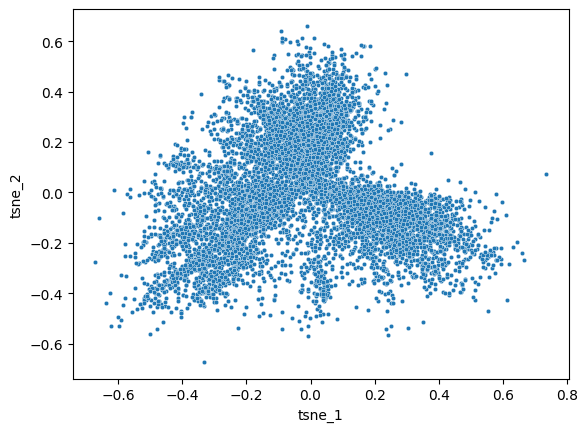

In [61]:
# Convert do DataFrame and plot
temp_df = pd.DataFrame({'tsne_1': subset_reduced[:,0],
                               'tsne_2': subset_reduced[:,1]})
fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', data=temp_df, ax=ax,s=10)
# lim = (tsne_result.min()-5, tsne_result.max()+5)
# ax.set_xlim(lim)
# ax.set_ylim(lim)
# ax.set_aspect('equal')
# ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

In [7]:
# get id columns
def get_id_data():
    # read
    merchants = pd.read_csv(merchants_path, usecols = feature_names['merchants']['id'])#, nrows = 100000) 
    new_transactions = pd.read_csv(new_transactions_path, usecols = feature_names['transactions']['id'])#, nrows = 100000)
    hist_transactions = pd.read_csv(historical_transactions_path, usecols = feature_names['transactions']['id'])#, nrows = 100000)
    # process
    # remove duplicate merchant_id - which there are
    merchants = merchants[~merchants.merchant_id.duplicated()]  
    # concat historical and new transactions - they have the same columns
    id_columns = pd.concat([hist_transactions, new_transactions], axis = 0)
    # fill missing merchant_id with the most frequent one 
    id_columns['merchant_id'] = id_columns['merchant_id'].fillna('M_ID_00a6ca8a8a')
    # merge transactions data with merchant information - merchant information has an additional "merchant_group_id" column
    id_columns = id_columns.merge(merchants[["merchant_id","merchant_group_id"]], how = "left", on = "merchant_id")
    del new_transactions, hist_transactions, merchants
    # convert these columns to edge list 
    to_process_cols = ['city_id', 'merchant_category_id', 'state_id','subsector_id', 'merchant_group_id']
    for c in to_process_cols:
        id_columns[c] = f"{c}_" + id_columns[c].astype(str)
    return id_columns
# id_columns = get_id_data()
# path = r"C:\Users\tanch\Documents\NTU\NTU Year 4\Semester 1\CZ4041 - Machine Learning\Team Project\data\id_columns_processed.csv"
# id_columns.to_csv(path, index = False)
# id_columns